# Coronavirus 
## Visualización

Este notebook tiene el objetivo de usar la libreria plotly para la visualizacion de variables respecto al avance del coronavirus a nivel global

## Grafica de mapa

In [1]:
from os import listdir
from os.path import isfile, join
import pandas as pd
import plotly.express as px

# Grafica variación coronavirus en el tiempo

In [7]:
## Hago lectura del archivo de la salida
#!!!!!!!!!!!!!AGREGAR UBICACION DE TU COMPUTADORA!!!!!!!!!!!!!!!!!!!!
path ='/mnt/28768037768007B0/projects/mateandocoronavirus/results/data/'

#construyo el dataframe
filenames = [f for f in listdir(path) if isfile(join(path, f))]

filenames.sort()
#del df
#del li
li = []
for filename in filenames:
    df = pd.read_csv(path+filename, sep=',',index_col=None)
    #print(filename[0:15])
    #Elimino ultima fila
    df=df[df['Country,Other'] != 'Total:']
    #agrego columnad con date
    df['Date']=filename[0:13]       
    li.append(df)

frame = pd.concat(li, axis=0, ignore_index=True)

#Agrego la columna CODE
##Leemos la base de datos. OJO el archivo debe encontrarse en la misma ubicacion que este codigo
CODE=pd.read_csv('/mnt/28768037768007B0/projects/mateandocoronavirus/results/graficos/CODE.csv', encoding="ISO-8859-1",sep=",",na_values=[0])
#agrego la columna de code a la base de datos
frame["Codes"] = ""
#Quito el acento y cecediña de dos lugares 
frame['Country,Other']=frame['Country,Other'].replace('Réunion', 'Reunion')
frame['Country,Other']=frame['Country,Other'].replace('Curaçao', 'Curacao')

m=0
for t in frame['Country,Other']:
    i=CODE['Country'].tolist().index(t)
    frame['Codes'][m]=CODE['Code'].iloc[i]
    m=m+1

#Grafica
##Grafica en mapa
fig = px.choropleth(frame, locations='Codes',
                       color='TotalCases', # lifeExp is a column of gapminder
                       hover_name='Country,Other', # column to add to hover information
                       color_continuous_scale='Reds',#px.colors.sequential.Plasma,
                       range_color=(0,500),
                       animation_frame="Date",
                       projection="natural earth")
texto= "Mapa interactivo Coronavirus <br>Fuente:https://www.worldometers.info/coronavirus/#countries</br> update:"+filename[0:16]
fig.update_layout(
    title={
        'text': texto,
        'y':0.975,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})
fig.update_layout(margin={"r":0,"l":0,"b":0})
fig.update_layout(mapbox_style="open-street-map")
fig.show()

import plotly.io as pio
pio.write_html(fig, file='/mnt/28768037768007B0/projects/mateandocoronavirus/results/graficos/Coronavirus.html', auto_open=False)

ValueError: 'CountryOther' is not in list

# Base de datos Hopkins


In [8]:
##Leemos la base de datos. OJO el archivo debe encontrarse en la misma ubicacion que este codigo
dfHP=pd.read_csv('/mnt/28768037768007B0/projects/mateandocoronavirus/results/data/Hopkins/confirmed_covid19_19-3.csv', encoding="ISO-8859-1",sep=",",na_values=[0])

df = pd.DataFrame() #creates a new dataframe that's empty

#reesctructuramos para que ande el plotly
li = []
h=[]
i=0
for col in dfHP.columns: 
    if col=='Province/State':
        h=1
    elif col=='Country/Region':
        h=1
    elif col=='Lat':
        h=1
    elif col=='Long':
        h=1
    else:       
       # print(col) 
        df=dfHP.iloc[:,0:4]
        df['Cantidad']=dfHP.iloc[:,4+i]
        df['Cantidad'].fillna(0, inplace=True)
        #df['Cantidad'] = df['Cantidad'].replace({'': 0}, regex=True)
        df['Date']=col
        li.append(df)
        i+=1

frame = pd.concat(li, axis=0, ignore_index=True)


##Grafica en mapa
fig = px.scatter_mapbox(frame, lat="Lat", lon="Long", color="Cantidad", size="Cantidad", range_color=[0,1000], animation_frame="Date",
                  color_continuous_scale=px.colors.cyclical.IceFire, size_max=100, zoom=1, height=680)
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"l":0,"b":0})
fig.update_layout(
    title={
        'text': "Mapa interactivo Coronavirus casos acumulados<br>Fuente:CSSE at Johns Hopkins University</br>",
        'y':0.12,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})
fig.show()
import plotly.io as pio
pio.write_html(fig, file='/mnt/28768037768007B0/projects/mateandocoronavirus/results/graficos/Coronavirus1.html', auto_open=False)

In [13]:
# iterating the columns 
for col in dfHP.columns: 
    print(col) 

Province/State
Country/Region
Lat
Long
1/22/20
1/23/20
1/24/20
1/25/20
1/26/20
1/27/20
1/28/20
1/29/20
1/30/20
1/31/20
2/1/20
2/2/20
2/3/20
2/4/20
2/5/20
2/6/20
2/7/20
2/8/20
2/9/20
2/10/20
2/11/20
2/12/20
2/13/20
2/14/20
2/15/20
2/16/20
2/17/20
2/18/20
2/19/20
2/20/20
2/21/20
2/22/20
2/23/20
2/24/20
2/25/20
2/26/20
2/27/20
2/28/20
2/29/20
3/1/20
3/2/20
3/3/20
3/4/20
3/5/20
3/6/20
3/7/20
3/8/20
3/9/20
3/10/20
3/11/20
3/12/20
3/13/20
3/14/20
3/15/20


## Grafica de barras

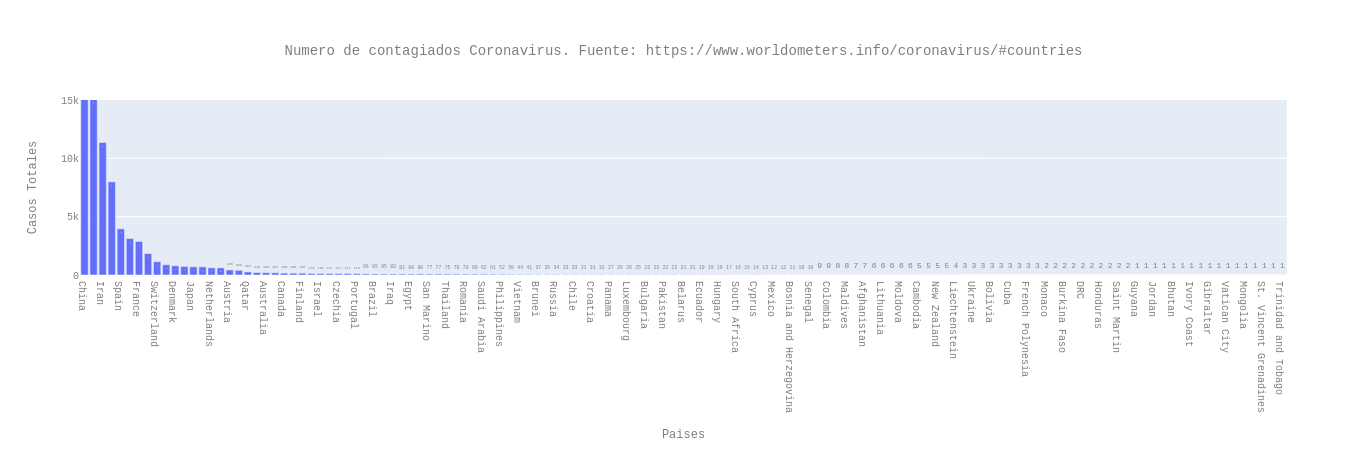

In [24]:
#Codigo Grafica
import plotly.graph_objects as go


# Ploteamos la grafica
fig = go.Figure()
fig = go.Figure(data=[go.Bar(
            x=df['Country,Other'], y=df['TotalCases'],
            text=df['TotalCases'],
            textposition='auto',
        )])
fig.update_layout(
    xaxis_title="Paises",
    yaxis_title="Casos Totales",
    yaxis=dict(range=[0,15000]),
    font=dict(
        family="Courier New, monospace",
        size=6,
        color="#7f7f7f"
    )
)
fig.update_layout(
    title={
        'text': "Numero de contagiados Coronavirus. Fuente: https://www.worldometers.info/coronavirus/#countries",
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
    font=dict(
        family="Courier New, monospace",
        size=10,
        color="#7f7f7f"
    ))

fig.show()

## Grafica de porcentajes

In [26]:
#Codigo Gráfica. Diagrama de Torta
#df['Percent']=df[:,1].div(totaldecasos)

#fig = go.Figure(data=[go.Pie(labels=df['Country,Others'], values=df['Percent'], hole=.2)])
#fig.update_layout(
#    title={
#        'text': " ",
#        'y':0.9,
#        'x':0.5,
#        'xanchor': 'center',
#        'yanchor': 'top'})
#fig.show()
